In [1]:
!git clone https://github.com/Senka2112/MARBLEHackaton

Cloning into 'MARBLEHackaton'...
remote: Enumerating objects: 8013, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 8013 (delta 0), reused 8 (delta 0), pack-reused 8005
Receiving objects: 100% (8013/8013), 173.04 MiB | 39.33 MiB/s, done.
Resolving deltas: 100% (1/1), done.
Updating files: 100% (8003/8003), done.


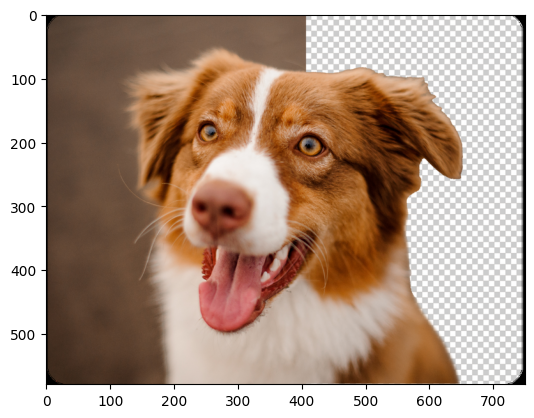

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np


img = cv2.imread("MARBLEHackaton/dog.png") 
if img is None:
  print("Error: File not found")

rgb_frame = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = np.array(rgb_frame)
plt.imshow(img)

The following code compares the normal RGB image to its own pure Hue image, no Saturation, no Value. Example steps:

    Load the image.
    Convert it from RGB to HSV.
    Copy HSV, and set its Saturation and Value to a constant number 255 (highest number, to ensure that the colors are visible and clear).


In [2]:
hsv_frame = cv2.cvtColor(rgb_frame, cv2.COLOR_RGB2HSV)

hsv_only = hsv_frame.copy()
hsv_only[:, :, 1] = 255 
hsv_only[:, :, 2] = 255

fig, ax = plt.subplots(1, 2)
ax[0].set_title('RGB image')
ax[0].imshow(rgb_frame)
ax[1].set_title('Hue only image')
ax[1].imshow(cv2.cvtColor(hsv_only, cv2.COLOR_HSV2RGB))
ax[0].axis('off')
ax[1].axis('off')

NameError: ignored

**Histogram equalizer** is a method that converts the distribution of colors in the image into a unified distribution, it targets rebalancing the total count of each bin in the histogram.

In our example, we are going to use it to equalize the Value channel in HSV. Steps:

    Extract Value channel.
    Equalize its histogram.
    Insert the equalized values back to Value channel in the original image.


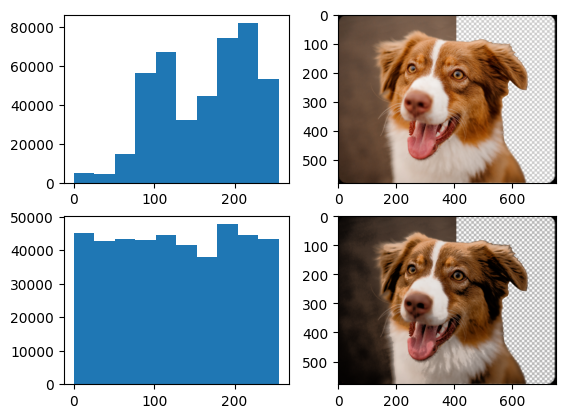

In [ ]:
def equalize(img_hsv):
    pixelsValueChannel = img_hsv[:,:,2]
    plt.subplot(221)
    plt.hist(pixelsValueChannel.flatten())
    plt.subplot(222)
    plt.imshow(cv2.cvtColor(img_hsv, cv2.COLOR_HSV2RGB))
    plt.subplot(223)
    new_valuechannel = cv2.equalizeHist(pixelsValueChannel)
    plt.hist(new_valuechannel.flatten())
    plt.subplot(224)
    img_hsv_new = img_hsv.copy()
    # adding the new value channel to the image
    img_hsv_new[:,:,2] = new_valuechannel
    plt.imshow(cv2.cvtColor(img_hsv_new, cv2.COLOR_HSV2RGB))

equalize(hsv_frame)

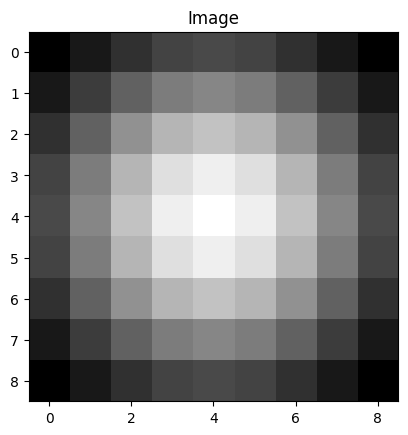

Found 3 Channels : (579, 750, 3)
Converted to Gray Channel. Size : (579, 750)
Kernel Shape : (9, 9)


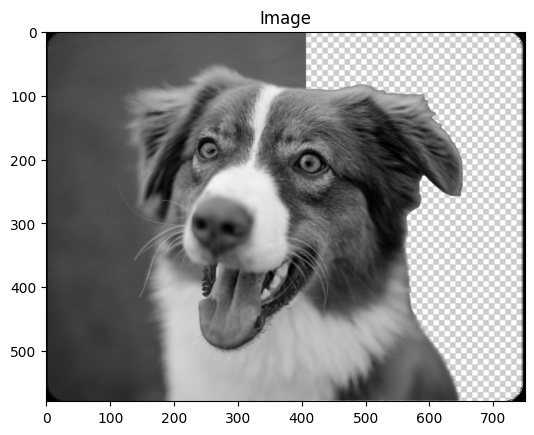

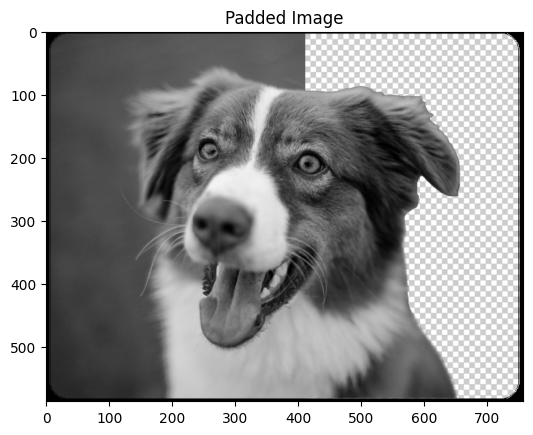

Output Image size : (579, 750)


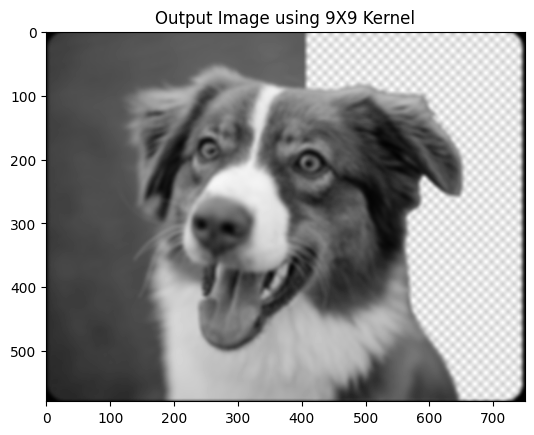

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
import math

def convolution(image, kernel, average=False, verbose=False):
    if len(image.shape) == 3:
        print("Found 3 Channels : {}".format(image.shape))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        print("Converted to Gray Channel. Size : {}".format(image.shape))
    else:
        print("Image Shape : {}".format(image.shape))
 
    print("Kernel Shape : {}".format(kernel.shape))
 
    if verbose:
        plt.imshow(image, cmap='gray')
        plt.title("Image")
        plt.show()
 
    image_row, image_col = image.shape
    kernel_row, kernel_col = kernel.shape
 
    output = np.zeros(image.shape)
 
    pad_height = int((kernel_row - 1) / 2)
    pad_width = int((kernel_col - 1) / 2)
 
    padded_image = np.zeros((image_row + (2 * pad_height), image_col + (2 * pad_width)))
 
    padded_image[pad_height:padded_image.shape[0] - pad_height, pad_width:padded_image.shape[1] - pad_width] = image
 
    if verbose:
        plt.imshow(padded_image, cmap='gray')
        plt.title("Padded Image")
        plt.show()
 
    for row in range(image_row):
        for col in range(image_col):
            output[row, col] = np.sum(kernel * padded_image[row:row + kernel_row, col:col + kernel_col])
            if average:
                output[row, col] /= kernel.shape[0] * kernel.shape[1]
 
    print("Output Image size : {}".format(output.shape))
 
    if verbose:
        plt.imshow(output, cmap='gray')
        plt.title("Output Image using {}X{} Kernel".format(kernel_row, kernel_col))
        plt.show()
 
    return output
 
def dnorm(x, mu, sd):
    return 1 / (np.sqrt(2 * np.pi) * sd) * np.e ** (-np.power((x - mu) / sd, 2) / 2)
 
 
def gaussian_kernel(size, sigma=1, verbose=False):
 
    kernel_1D = np.linspace(-(size // 2), size // 2, size)
    for i in range(size):
        kernel_1D[i] = dnorm(kernel_1D[i], 0, sigma)
    kernel_2D = np.outer(kernel_1D.T, kernel_1D.T)
 
    kernel_2D *= 1.0 / kernel_2D.max()
 
    if verbose:
        plt.imshow(kernel_2D, interpolation='none',cmap='gray')
        plt.title("Image")
        plt.show()
 
    return kernel_2D

def gaussian_blur(image, kernel_size, verbose=False):
    kernel = gaussian_kernel(kernel_size, sigma=math.sqrt(kernel_size), verbose=verbose)
    return convolution(image, kernel, average=True, verbose=verbose)

image = gaussian_blur(rgb_frame, 9, verbose=True)
display(image)


Image Shape : (579, 750)
Kernel Shape : (3, 3)
Output Image size : (579, 750)


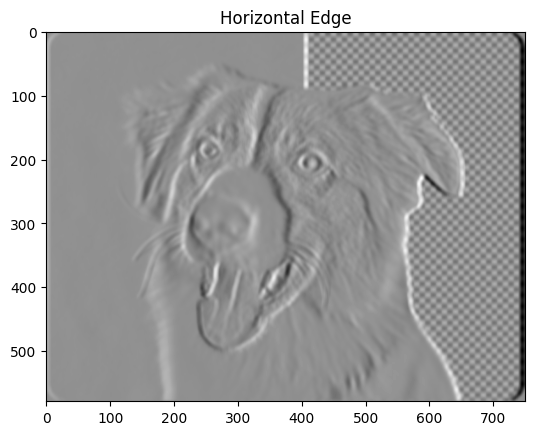

Image Shape : (579, 750)
Kernel Shape : (3, 3)
Output Image size : (579, 750)


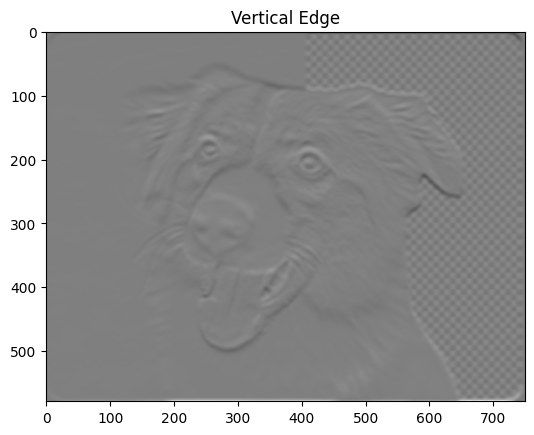

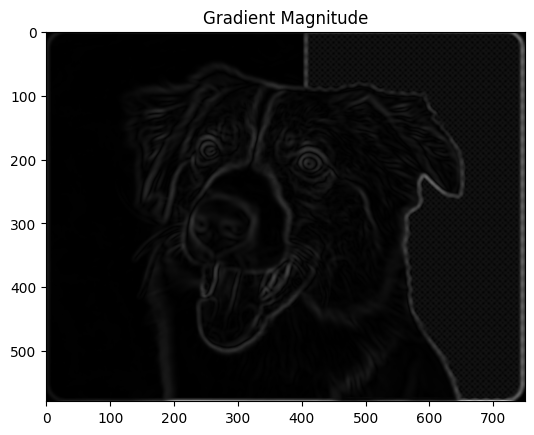

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
filter = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])

def sobel_edge_detection(image, filter, verbose=False):
    new_image_x = convolution(image, filter, verbose)
 
    if verbose:
        plt.imshow(new_image_x, cmap='gray')
        plt.title("Horizontal Edge")
        plt.show()
 
    new_image_y = convolution(image, np.flip(filter.T, axis=0), verbose)
 
    if verbose:
        plt.imshow(new_image_y, cmap='gray')
        plt.title("Vertical Edge")
        plt.show()
 
    gradient_magnitude = np.sqrt(np.square(new_image_x) + np.square(new_image_y))
 
    gradient_magnitude *= 255.0 / gradient_magnitude.max()
 
    if verbose:
        plt.imshow(gradient_magnitude, cmap='gray')
        plt.title("Gradient Magnitude")
        plt.show()
 
    return gradient_magnitude
 


sobel_edge_detection(image, filter, verbose=True)

Otsu's Segmentation- Threshold based segmentation

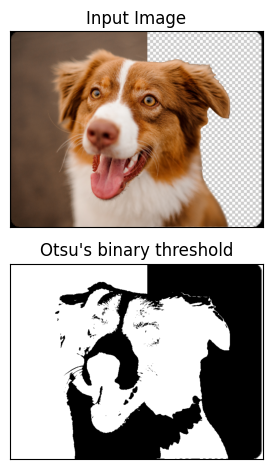

In [ ]:
gray = cv2.cvtColor(rgb_frame,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
# noise removal
kernel = np.ones((2,2),np.uint8)
#opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)
closing = cv2.morphologyEx(thresh,cv2.MORPH_CLOSE,kernel, iterations = 2)
# sure background area
sure_bg = cv2.dilate(closing,kernel,iterations=3)
# Finding sure foreground area
dist_transform = cv2.distanceTransform(sure_bg,cv2.DIST_L2,3)
# Threshold
ret, sure_fg = cv2.threshold(dist_transform,0.1*dist_transform.max(),255,0)
# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)
# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
# Now, mark the region of unknown with zero
markers[unknown==255] = 0
markers = cv2.watershed(img,markers)
img[markers == -1] = [255,0,0]
plt.subplot(211),plt.imshow(rgb_frame)
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(212),plt.imshow(thresh, 'gray')
plt.title("Otsu's binary threshold"), plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.show()

# **Support Vector Machine**


In [2]:
#!cd MARBLEHackaton
#!ls
import pandas as pd
import os
from skimage.transform import resize
from skimage.io import imread
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [3]:
Categories=['cats','dogs']
flat_data_arr=[] #input array
target_arr=[] #output array
datadir='MARBLEHackaton/IMAGES/' 
!ls
#path which contains all the categories of images
for i in Categories:
      
    print(f'loading... category : {i}')
    path=os.path.join(datadir,i)
    print(path)
    for img in os.listdir(path):
        img_array=imread(os.path.join(path,img))
        img_resized=resize(img_array,(150,150,3))
        flat_data_arr.append(img_resized.flatten())
        target_arr.append(Categories.index(i))
    print(f'loaded category:{i} successfully')
flat_data=np.array(flat_data_arr)
target=np.array(target_arr)

MARBLEHackaton	sample_data
loading... category : cats
MARBLEHackaton/IMAGES/cats
loaded category:cats successfully
loading... category : dogs
MARBLEHackaton/IMAGES/dogs
loaded category:dogs successfully


In [4]:
#dataframe
df=pd.DataFrame(flat_data) 
df['Target']=target
df.shape

(8000, 67501)

In [ ]:
#input data 
x=df.iloc[:,:-1] 
#output data
y=df.iloc[:,-1]
#dataframe
df=pd.DataFrame(flat_data) 
df['Target']=target
df.shape

# Splitting the data into training and testing sets
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,
                                               random_state=77,
                                               stratify=y)

**Constructing a model**

The parameter grid specifies the hyperparameters that we want to tune, including C, gamma, and kernel. C is the penalty parameter of the error term, gamma is the kernel coefficient, and the kernel is the kernel type. We provide a range of values for each hyperparameter, and GridSearchCV will perform an exhaustive search over all possible combinations of hyperparameters to find the optimal values.

In [ ]:
# Defining the parameters grid for GridSearchCV
param_grid={'C':[0.1,1,10,100],
            'gamma':[0.0001,0.001,0.1,1],
            'kernel':['rbf','poly']}
  
# Creating a support vector classifier
svc=svm.SVC(probability=True)
  
# Creating a model using GridSearchCV with the parameters grid
model=GridSearchCV(svc,param_grid)

In [ ]:
# Training the model using the training data
model.fit(x_train,y_train)

NameError: ignored

In [ ]:
# Testing the model using the testing data
y_pred = model.predict(x_test)
  
# Calculating the accuracy of the model
accuracy = accuracy_score(y_pred, y_test)
  
# Print the accuracy of the model
print(f"The model is {accuracy*100}% accurate")

In [ ]:
print(classification_report(y_test, y_pred, target_names=['cat', 'dog']))

Tests

In [ ]:
path='IMAGES/dogs/dog.4001.jpg'
img=imread(path)
plt.imshow(img)
plt.show()
img_resize=resize(img,(150,150,3))
l=[img_resize.flatten()]
probability=model.predict_proba(l)
for ind,val in enumerate(Categories):
    print(f'{val} = {probability[0][ind]*100}%')
print("The predicted image is : "+Categories[model.predict(l)[0]])